In [17]:
from IPython.display import Markdown, display
display(Markdown("header-project.md"))

header-project.md

## **[GROUP WORK] Project step 02: multivariate staisticss**

In order to prepare the data science project that will need to complete, gather in project group and answer the following questions:

Start from your clean data set (from yesterday)


## How are the different variables related to each other two by two ?

1. Compute the correlation matrix of all the quantitative variables.
4. You should be able de get rid of a quite useless column (obvious one)
Another column was artificially generated, can you find out which one ? Once you found it get rid of it!
2. Display scatter plot matrix
3. Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./Data/california_houses_new.csv")

In [3]:
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Tot_No_Bedrooms,Max_Age,Closest_city
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,9263.040773,751.0,50.0,SanFrancisco
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,10225.733072,5993.0,34.0,SanFrancisco
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8259.085109,1277.0,66.0,SanFrancisco
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,7768.086571,1039.0,63.0,SanFrancisco
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,7768.086571,1347.0,68.0,SanFrancisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20572,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09,162031.481121,1291.0,41.0,SanFrancisco
20573,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21,160445.433537,547.0,32.0,SanFrancisco
20574,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22,153754.341182,1769.0,35.0,SanFrancisco
20575,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32,152005.022239,1451.0,32.0,SanFrancisco


/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_73242/3401634499.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


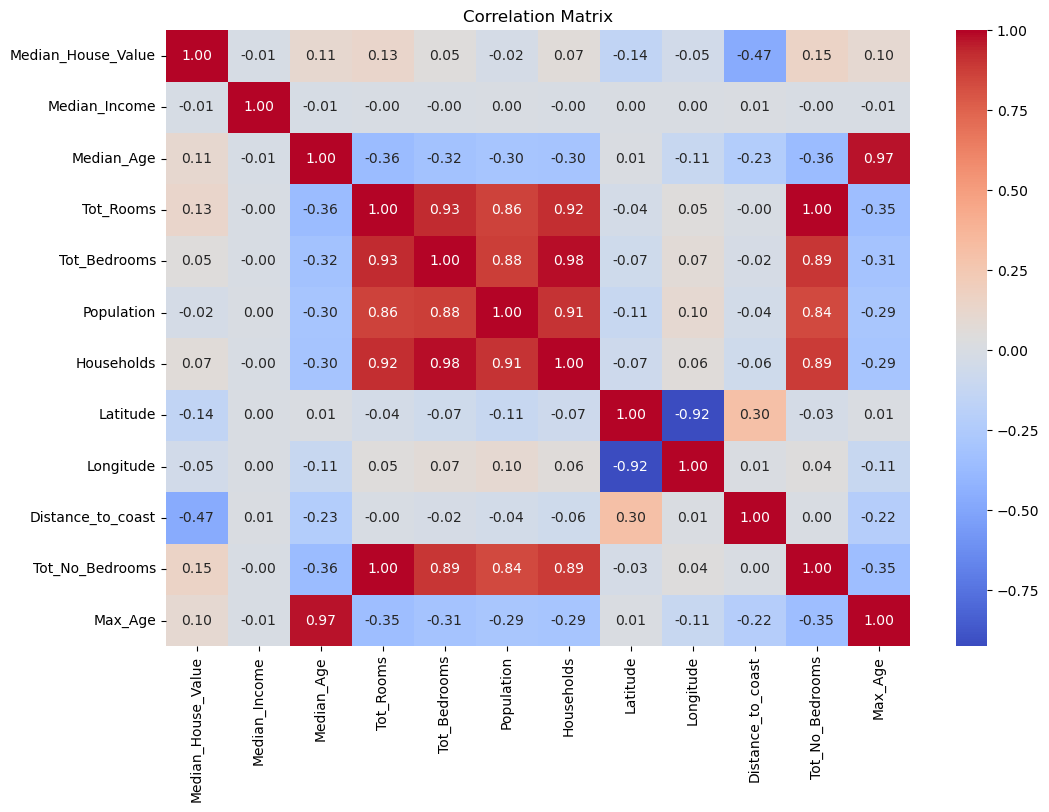

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')

plt.show()


In [21]:
df[['Tot_Rooms','Tot_Bedrooms', 'Tot_No_Bedrooms']]

,Tot_Rooms,Tot_Bedrooms,Tot_No_Bedrooms
0,880.0,129.0,751.0
1,7099.0,1106.0,5993.0
2,1467.0,190.0,1277.0
3,1274.0,235.0,1039.0
4,1627.0,280.0,1347.0
...,...,...,...
20572,1665.0,374.0,1291.0
20573,697.0,150.0,547.0
20574,2254.0,485.0,1769.0
20575,1860.0,409.0,1451.0


In [22]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Tot_No_Bedrooms', 'Max_Age', 'Closest_city'],
      dtype='object')

In [23]:
df.drop(columns=['Tot_No_Bedrooms', 'Closest_city'], inplace=True)

/Users/fulin/anaconda3/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

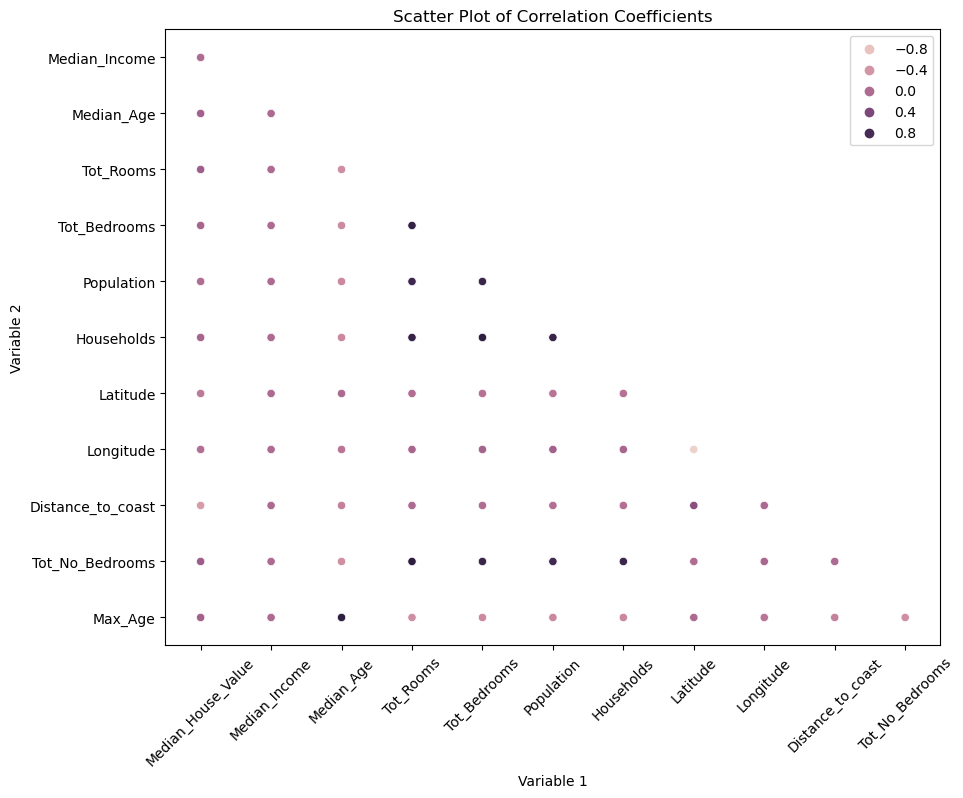

In [24]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

plt.figure(figsize=(10, 8))

sns.scatterplot(x=upper_triangle.stack().index.get_level_values(0), 
                y=upper_triangle.stack().index.get_level_values(1), 
                hue=upper_triangle.stack().values, cmap='coolwarm')

plt.title('Scatter Plot of Correlation Coefficients')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

plt.xticks(rotation = 45)

plt.colorbar()

plt.show()


Top Correlations with 'Median_House_Value':
Distance_to_coast    0.469280
Latitude             0.144368
Tot_Rooms            0.134174
Median_Age           0.105784
Max_Age              0.102312
Name: Median_House_Value, dtype: float64


/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_35976/1300789626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


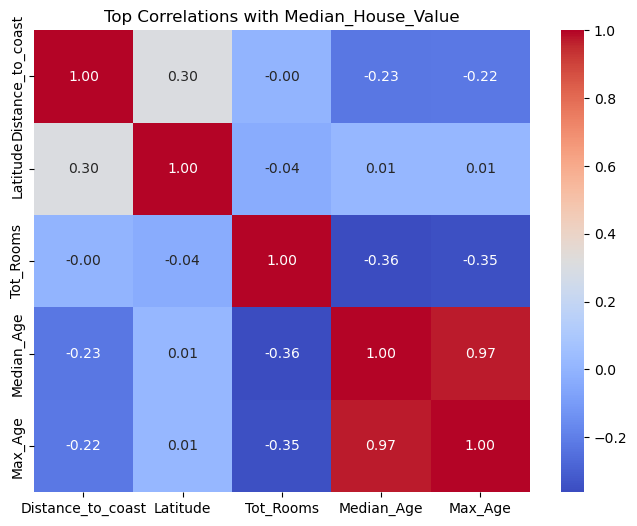

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the absolute correlations with 'Median_House_Value' and sort them in descending order
correlations_with_target = correlation_matrix['Median_House_Value'].abs().sort_values(ascending=False)

# Display the top N correlations
N = 5  # Change this value to the desired number of top correlations
top_correlations = correlations_with_target[1:N+1]  # Exclude the target variable itself
print("Top Correlations with 'Median_House_Value':")
print(top_correlations)

# Plot a heatmap of the top correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_correlations.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlations with Median_House_Value')
plt.show()

In [36]:
def scatterplot(col):

    plt.figure()

    sns.scatterplot(x = df['Median_House_Value'], y = df[col]).set(xlabel = 'Median house value', ylabel = str(col))

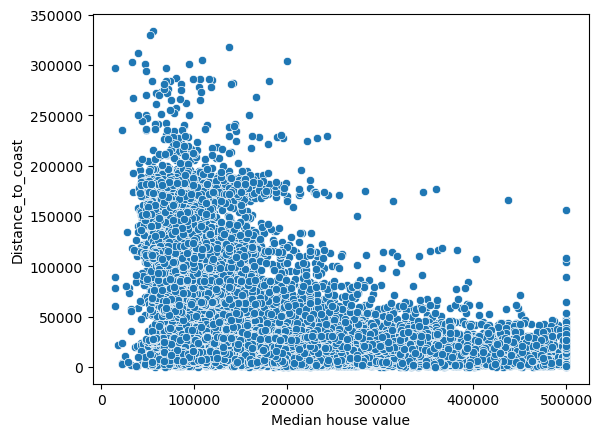

In [37]:
scatterplot('Distance_to_coast')

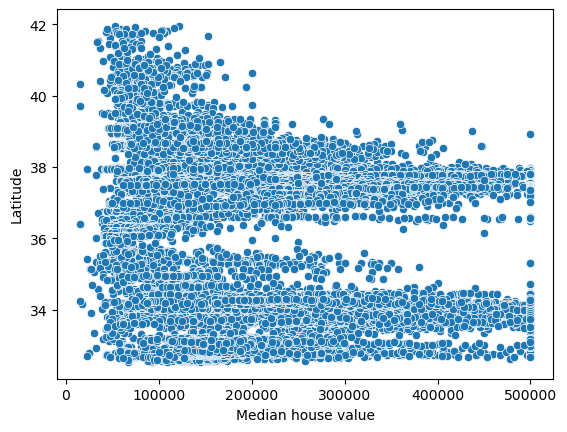

In [38]:
scatterplot('Latitude')

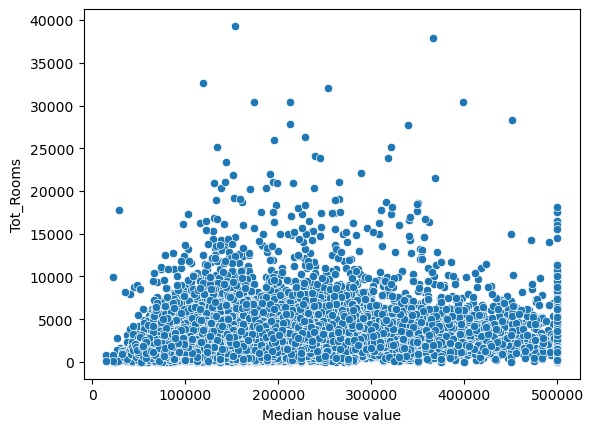

In [39]:
scatterplot('Tot_Rooms')

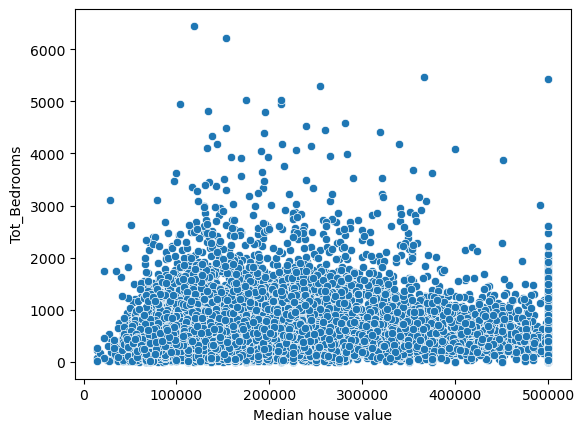

In [42]:
scatterplot('Tot_Bedrooms')

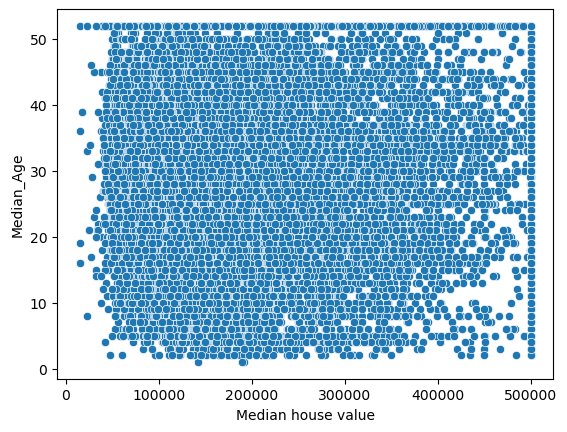

In [40]:
scatterplot('Median_Age')

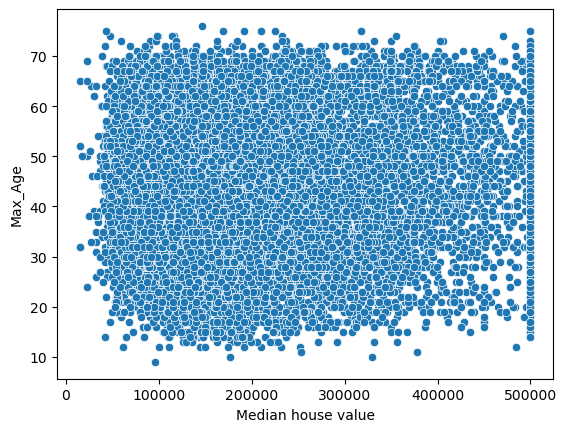

In [41]:
scatterplot('Max_Age')

In [48]:
# plt.subplot(1, 2, 1)
# plt.plot(scatterplot('Tot_Rooms'))
# plt.subplot(1, 2, 2)
# scatterplot('Tot_Bedrooms')
# plt.show

# fig, ax = plt.subplots(nrows = 1, ncols = 2)
# ax[0].scatterplot('Tot_Rooms')
# ax[1].scatterplot('Tot_Bedrooms')

What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

**What special observations are you drawing from these scatter plots?**

Is the total number of rooms or bedrooms per district meaningful ? <br>
If so explain why, if not what are your suggestions ?

## Explore new variables

**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
4. People per household

**Let us again look at the correlation between the predictors and the target**

What is your conclusion?

Do not forget to save your dataset!

In [49]:
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Max_Age
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,9263.040773,50.0
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,10225.733072,34.0
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8259.085109,66.0
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,7768.086571,63.0
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,7768.086571,68.0
...,...,...,...,...,...,...,...,...,...,...,...
20572,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09,162031.481121,41.0
20573,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21,160445.433537,32.0
20574,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22,153754.341182,35.0
20575,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32,152005.022239,32.0


In [59]:
def find_nearest_destination(row):
    # distances = row[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']]
    # nearest_destination = distances.idxmin()
    room_per_house = row['Tot_Rooms'] / row['Households']
    bedroom_per_room = row['Tot_Bedrooms'] / row['Tot_Rooms']
    people_per_household = row['Population'] / row['Households']
    return room_per_house, bedroom_per_room, people_per_household

df[['room_per_house', 'bedroom_per_room', 'people_per_household']]= df.apply(find_nearest_destination, axis=1, result_type = 'expand')
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Max_Age,room_per_house,bedroom_per_room,people_per_household
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,9263.040773,50.0,6.984127,0.146591,2.555556
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,10225.733072,34.0,6.238137,0.155797,2.109842
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8259.085109,66.0,8.288136,0.129516,2.802260
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,7768.086571,63.0,5.817352,0.184458,2.547945
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,7768.086571,68.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20572,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09,162031.481121,41.0,5.045455,0.224625,2.560606
20573,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21,160445.433537,32.0,6.114035,0.215208,3.122807
20574,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22,153754.341182,35.0,5.205543,0.215173,2.325635
20575,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32,152005.022239,32.0,5.329513,0.219892,2.123209


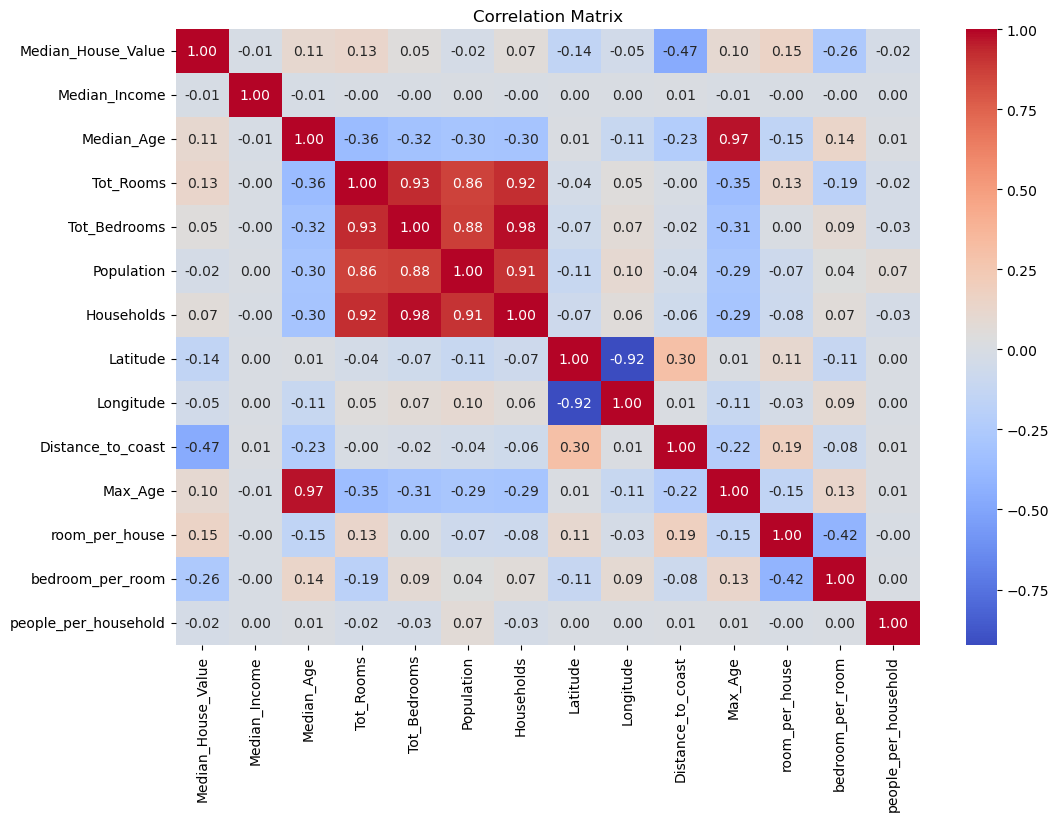

In [60]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')

plt.show()

Top Correlations with 'Median_House_Value':
Distance_to_coast    0.469280
bedroom_per_room     0.256100
room_per_house       0.151815
Latitude             0.144368
Tot_Rooms            0.134174
Median_Age           0.105784
Name: Median_House_Value, dtype: float64


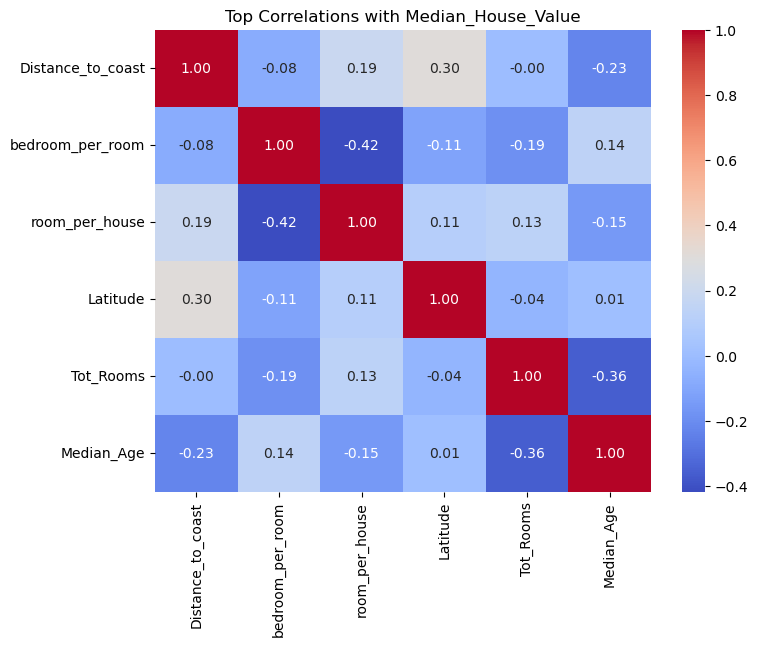

In [65]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the absolute correlations with 'Median_House_Value' and sort them in descending order
correlations_with_target = correlation_matrix['Median_House_Value'].abs().sort_values(ascending=False)

# Display the top N correlations
N = 6  # Change this value to the desired number of top correlations
top_correlations = correlations_with_target[1:N+1]  # Exclude the target variable itself
print("Top Correlations with 'Median_House_Value':")
print(top_correlations)

# Plot a heatmap of the top correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_correlations.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlations with Median_House_Value')
plt.show()

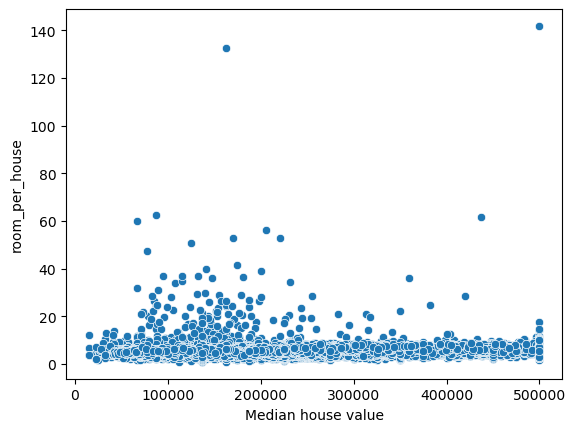

In [62]:
scatterplot('room_per_house')

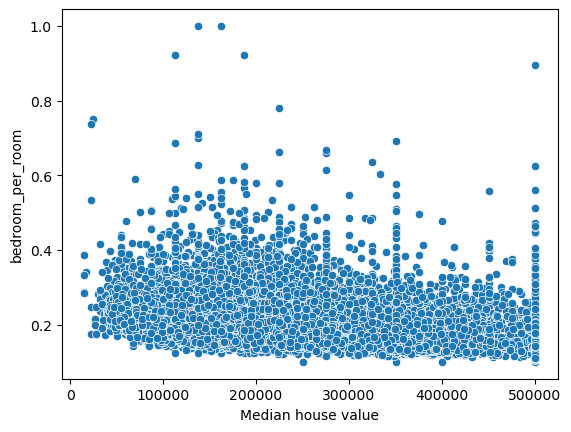

In [63]:
scatterplot('bedroom_per_room')

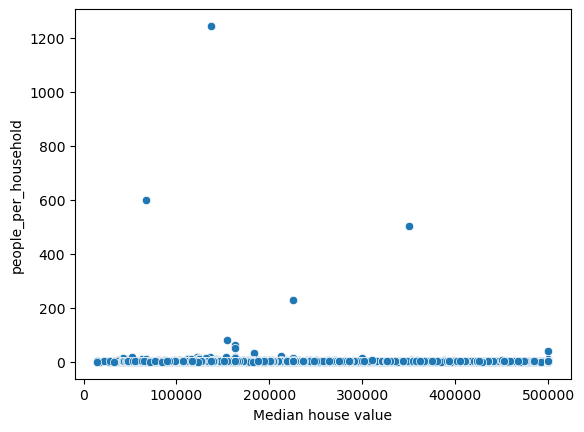

In [64]:
scatterplot('people_per_household')

In [86]:
def scatterplot_lim(col):

    plt.figure()

    ax = sns.scatterplot(x = df['Median_House_Value'], y = df[col])
    ax.set(xlabel = 'Median house value', ylabel = str(col))
    ax.set_ylim(0,6)
    plt.show()

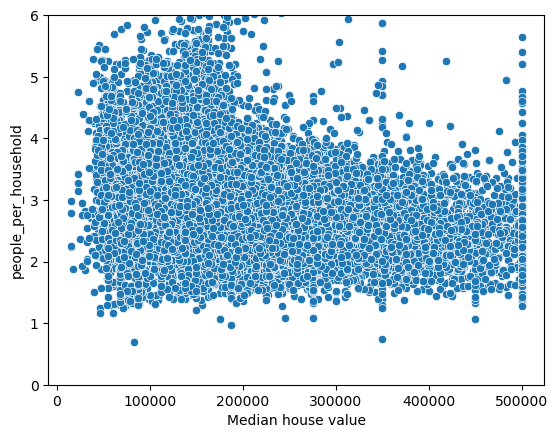

In [87]:
scatterplot_lim('people_per_household')